<a href="https://colab.research.google.com/github/duanzhihua/-transformer-english2chinese-/blob/main/LangGraph_%E7%AF%87_%E5%BF%AB%E9%80%9F%E5%85%A5%E9%96%80%E6%95%99%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🥱 LangGraph 篇_快速入門教學

❤️ Created by [hengshiousheu](https://huggingface.co/Heng666).

#LangGraph 介紹

LangGraph 是一個使用 LLM 建立有狀態多參與者應用程式的函式庫。受 Pregel 和 Apache Beam 的啟發，LangGraph 允許您使用常規 Python 函數（或 JS）跨週期性計算步驟協調和檢查多個鏈（或參與者）。公共介面的靈感來自 NetworkX。

它的主要用途是LLM為應用程式添加循環和持久性。，可以使用[LangChain Expression Language](https://python.langchain.com/docs/expression_language/) 協助進行開發。

## 環境建置

### 安裝套件包

在本演練中，

我們將使用以下套件：

In [ ]:
%pip install --upgrade --quiet langchain
%pip install --upgrade --quiet langchain-openai
%pip install --upgrade --quiet langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 450.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/9

我們需要設置 環境變數 `OPENAI_API_KEY` ，可以直接完成，如下所示：

In [ ]:
import os
import getpass
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

TimeoutException: Requesting secret OPENAI_API_KEY timed out. Secrets can only be fetched when running from the Colab UI.

### (可用可不用)LangSmith

你用LangChain構建的許多應用程式將包含多個步驟，並多次調用LLM調用。隨著這些應用程式變得越來越複雜，能夠檢查您的鏈或代理內部到底發生了什麼變得至關重要。最好的方法是與[LangSmith](https://smith.langchain.com)合作。

請注意，LangSmith 不是必需的，但它很有説明。如果您確實想使用 LangSmith，請在上面的鏈接中註冊后，請確保設置環境變數以開始記錄跟蹤：

In [ ]:
import os
import getpass

os.environ["LANGCHAIN_TRACING_V2"] = "false" ##想要使用記得改 true, 不要時改 false.
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')

## 開始第一個圖

創建了一個非常簡單的LangGraph工作流,它只包含一個節點("first_node"),該節點使用ChatOpenAI模型處理輸入,然後直接結束。

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

# 定義模型:
model = ChatOpenAI(temperature=0)

# 初始化圖形:
graph = MessageGraph()

# 添加節點:
graph.add_node("first_node", model)

# 添加邊:
graph.add_edge("first_node", END)

# 設置入口點:
graph.set_entry_point("first_node")

# 編譯圖:
runnable = graph.compile()

開始與 Graph 溝通

In [ ]:
Message = "請問中華民國總統是誰？"
response = runnable.invoke(HumanMessage(Message))

for r in response:
    print("{}: {}".format(r.type, r.content))

human: 請問中華民國總統是誰？
ai: 中華民國（台灣）的總統目前是蔡英文。


## 可視化結果

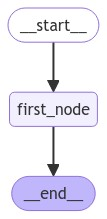

In [ ]:
from IPython.display import Image, display

display(Image(runnable.get_graph(xray=True).draw_mermaid_png()))

# 重新認識 LangGraph 元素組成

LangGraph 透過專注於四個慣見元件來簡化 AI Agent 開發：

- Graph:  它是LangGraph的核心元件，是節點和邊的集合。
- State: 在節點之間轉換期間維護的訊息，由每個節點引用和更新。
- Node: 表示圖中各個步驟或狀態並充當特定操作或檢查點的元素。
- Edge: 表示節點之間的連接並定義轉換條件和操作。您可以根據特定邏輯（例如條件邊）控制轉換。

LangGraph 透過在網路中不同的節點之間傳遞訊息來處理資訊。每個節點代表一個可執行任務的點。當節點完成其任務時，他會向一個或多個其他節點發送訊息，執行自己的任務後並將結果傳遞給下一個節點。當圖開始運作時，所有節點都處於非活動狀態，等待訊息觸發。

## Graph

Graph是管理整個圖的元件，是LangGraph的核心。對於基本用法，請使用名為 StateGraph 的類別並使用下面描述的 State 對其進行初始化。

In [ ]:
from langchain_core.pydantic_v1 import BaseModel
from langgraph.graph import StateGraph

# 定義狀態
class State(BaseModel):
    value: str

# Stateを引数としてGraphを初期化
graph = StateGraph(State)

## State
State 是傳遞給圖中的 Node 和 Edge 的狀態物件。

對於狀態，您可以使用 typing 模組中的“TypeDict”或“Pydantic's BaseModel”。

以下是繼承自 Pydantic 的 State 的範例。



In [ ]:
# 定義狀態
class State(BaseModel):
    value: str

## Node

Node 是在圖上執行實際步驟的元件。

例如，實際使用LangChain呼叫LLM模型的過程是在Node上完成的。

在 Node 中，您可以使用帶有簽名` (State、Config) -> State `的函數。

In [ ]:
from langchain_core.runnables import RunnableConfig

# 宣告 Node
def node(state: State, config: RunnableConfig):
    return {"value": "hoge"}

#將節點放入 Graph 中
graph.add_node("node", node)

## Edge

邊是定義每個節點或圖行為方式（路由、定義起點等）的元件。

In [ ]:
# 宣告兩個節點
def node(state: State, config: RunnableConfig):
    return {"value": "hoge"}

def node2(state: State, config: RunnableConfig):
    return {"value": "fuga"}

graph_builder = StateGraph(State)
graph_builder.add_node("node", node)
graph_builder.add_node("node2", node2)

# 使用 Edge 將 Node 進行連接
graph_builder.add_edge("node", "node2")

# 宣告 Graph 起始點
graph_builder.set_entry_point("node")

# 宣告 Graph 終點
graph_builder.set_finish_point("node2")

## 全部結合再一起

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph

# 定義狀態
class State(TypedDict):
    value: str

# 宣告 Node
def node(state: State, config: RunnableConfig):
    return {"value": "1"}

def node2(state: State, config: RunnableConfig):
    return {"value": "2"}

# StateGraph
graph_builder = StateGraph(State)

# Node
graph_builder.add_node("node", node)
graph_builder.add_node("node2", node2)

# Edge
graph_builder.add_edge("node", "node2")

# 起始點
graph_builder.set_entry_point("node")

# 終點
graph_builder.set_finish_point("node2")

# 宣告 Graph
graph = graph_builder.compile()


graph.invoke({"value": ""})

{'value': '2'}

將結果可視化出來

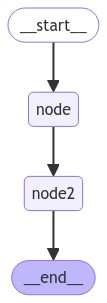

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# 結語

上面我們介紹了LangGraph的基本用法。